# Exercise Week 7:Clustering
-------------------------------------------

dataset:

a. https://raw.githubusercontent.com/GTerrence/dataset/main/COVID-19%20Coronavirus.csv


Import library yang dibutuhkan

In [1]:
import pandas as pd

Load dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GTerrence/dataset/main/COVID-19%20Coronavirus.csv')
df

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


Data Preparation

1. cek apakah masih ada missing value pada data
2. lakukan label encoder
3. lakukan feature scaling pada data

In [3]:
# df[df.isnull().any(axis=1)]
# df.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Continent'] = encoder.fit_transform(df['Continent'])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(df.iloc[:,3:])

In [4]:
df = pd.DataFrame(df,columns=['Population','Continent','Total Cases','Total Deaths','Tot Cases//1M pop','Tot Deaths/1M pop','Death percentage'])
df

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204
...,...,...,...,...,...,...,...
220,-0.252370,2.205914,-0.300882,-0.283846,-0.657924,-0.380297,0.056233
221,-0.247964,-1.188960,-0.300943,-0.283908,-0.945741,-0.917573,4.923244
222,-0.029496,-0.509986,-0.299318,-0.261751,-0.943220,-0.861415,9.613966
223,-0.113643,-1.188960,-0.257269,-0.242884,-0.832253,-0.746584,-0.111060


## K-Means Clustering

Dengan elbow method, tentukan jumlah cluster yang ingin dibentuk

Gunakan range elbow range(1, 11)

In [5]:
from sklearn.cluster import KMeans

k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df.iloc[:,:])
    sse.append(km.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11),sse,curve="convex",direction="decreasing")
kl.elbow

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

4

Training model K-Means pada dataset dengan jumlah cluster yang Anda tentukan

In [6]:
km = KMeans(n_clusters=5,max_iter=300,random_state=42)
y_pred = km.fit_predict(df.iloc[:,:])
df['Cluster'] = y_pred
df

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Cluster
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,0
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,3
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0
...,...,...,...,...,...,...,...,...
220,-0.252370,2.205914,-0.300882,-0.283846,-0.657924,-0.380297,0.056233,3
221,-0.247964,-1.188960,-0.300943,-0.283908,-0.945741,-0.917573,4.923244,0
222,-0.029496,-0.509986,-0.299318,-0.261751,-0.943220,-0.861415,9.613966,0
223,-0.113643,-1.188960,-0.257269,-0.242884,-0.832253,-0.746584,-0.111060,0


Tampilkan dalam bentuk dataframe kesimpulan dari cluster:

1. kolom bertipe categorical: modus (gunakan pd.Series.mode untuk mencari modus, untuk menggunakan attribute ini tidak perlu pakai " ")
2. kolom bertipe continous : mean
3. Hasil cluster: count

In [7]:
# cluster = df['Cluster'].unique()
# cl0 = df.loc[df['Cluster'] == 0]
# cl1 = df.loc[df['Cluster'] == 1]
# cl2 = df.loc[df['Cluster'] == 2]
# cl3 = df.loc[df['Cluster'] == 3]
# cl4 = df.loc[df['Cluster'] == 4]
# Clusterresult = df['Cluster'].unique()
# result = pd.DataFrame(Clusterresult,columns=['cluster'])
# # df.groupby('Cluster').agg(['mean', pd.Series.mode])
df.groupby('Cluster').agg({'Population': 'mean', 'Continent': pd.Series.mode,'Total Cases':'mean',	'Total Deaths' : "mean", "Tot Cases//1M pop" : "mean", "Tot Deaths/1M pop" : "mean", 'Death percentage' : 'mean'})

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Cluster,,,,,,,
0,-0.014091,-1.18896,-0.195711,-0.176833,-0.724344,-0.639651,0.296276
1,9.979451,-0.509986,2.673247,2.436637,-0.839587,-0.762509,0.380005
2,-0.132041,0.168989,0.174667,0.125285,1.131201,0.963359,-0.216609
3,-0.219631,0.847964,-0.250791,-0.244664,-0.219978,-0.194582,-0.223303
4,1.725515,"[0.8479640966794948, 1.5269389071879869]",7.401721,8.345356,0.381153,1.630087,0.156693


## Hierarchical Clustering
Hierarchical clustering ini menggunakan metode agglomerative.

Plot Dendrogram untuk membantu menentukan jumlah cluster, gunakan max method.

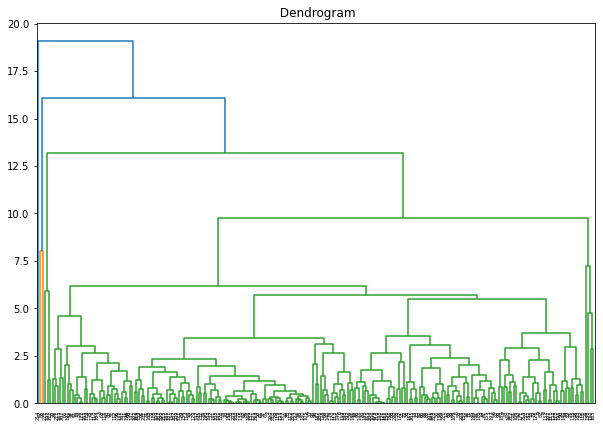

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title(" Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = df.iloc[:, :]
dendrogram = sch.dendrogram(sch.linkage(selected_data, method='complete'))
plt.show()

Lakukan hierarchical clustering dengan metric Euclidean dan jumlah cluster sama dengan cluster Kmeans

In [9]:
 from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df)
labels = model.labels_
seconddf = df
seconddf['Cluster'] = labels

Tampilkan dalam bentuk dataframe kesimpulan dari cluster dengan kriteria sama dengan kesimpulan di atas

In [10]:
df.groupby('Cluster').agg({'Population': 'mean', 'Continent': pd.Series.mode,'Total Cases':'mean',	'Total Deaths' : "mean", "Tot Cases//1M pop" : "mean", "Tot Deaths/1M pop" : "mean", 'Death percentage' : 'mean'})

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Cluster,,,,,,,
0,7.371130,-0.509986,5.439511,5.006070,-0.311382,0.027619,0.212641
1,-0.014091,-1.188960,-0.195711,-0.176833,-0.724344,-0.639651,0.296276
2,-0.112200,0.168989,0.225455,0.214458,1.115730,0.972928,-0.207553
3,-0.219631,0.847964,-0.250791,-0.244664,-0.219978,-0.194582,-0.223303
